In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  # scipy and numpy is not compatible

import csv
import httplib2
from apiclient.discovery import build
import urllib
import json

# This API key is provided by google as described in the tutorial
API_KEY = '...'

# This is the table id for the fusion table
TABLE_ID = '1RYpzYZavgCONoIFJ9OvdecJRbtepSnYf9tKJGD11'

try:
    fp = open("data.json")
    response = json.load(fp)
except IOError:
    service = build('fusiontables', 'v1', developerKey=API_KEY)
    query = "SELECT * FROM " + TABLE_ID + " WHERE Medal NOT EQUAL TO 'NA'"
    response = service.query().sql(sql=query).execute()
    fp = open("data.json", "w+")
    json.dump(response, fp)
    
data_df = pd.DataFrame(response[u'rows'], columns = response[u'columns'])

# Completeness

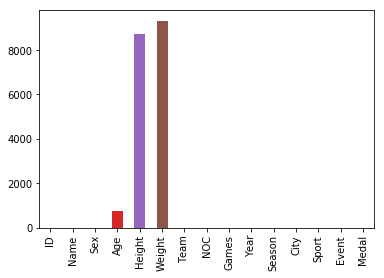

In [2]:
(data_df == 'NaN').apply(np.sum).plot.bar()
plt.savefig('NaN_col_dist', bbox_inches='tight', dpi=1000)

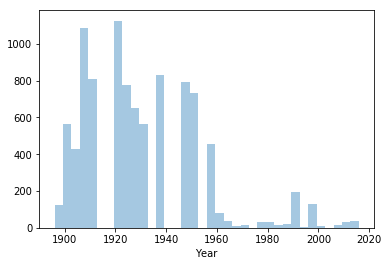

In [3]:
missing = data_df[(data_df == 'NaN').apply(np.any, axis=1)]
sns.distplot(pd.to_numeric(missing['Year']), kde=False)
plt.savefig('NaN_year_dist', bbox_inches='tight', dpi=1000)

# Coherent

In [4]:
rest = pd.DataFrame(data_df[~(data_df == 'NaN').apply(np.any, axis=1)])
rest.describe()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,30181,30181,30181,30181,30181,30181,30181,30181,30181,30181,30181,30181,30181,30181,30181
unique,20767,20732,2,50,86,183,263,143,51,35,2,42,55,562,3
top,94406,"Michael Fred Phelps, II",M,23,180,70,United States,USA,2008 Summer,2008,Summer,London,Athletics,Ice Hockey Men's Ice Hockey,Gold
freq,28,28,19831,2742,1715,1254,4273,4383,2035,2035,25341,2231,3648,1001,10167


In [5]:
for colname in ['ID', 'Age', 'Height', 'Weight', 'Year']:
    rest.loc[:,colname] = pd.to_numeric(rest.loc[:,colname])
rest.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


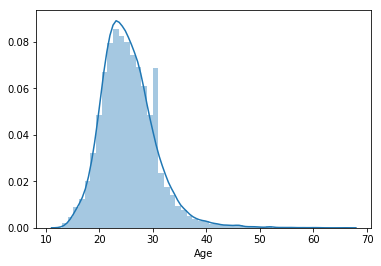

In [6]:
sns.distplot(rest['Age'])
plt.savefig('Age_dist', bbox_inches='tight', dpi=1000)

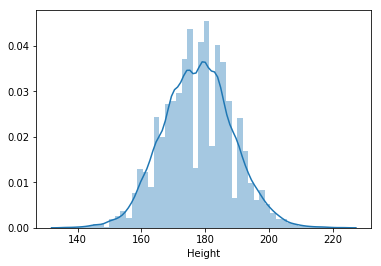

In [7]:
sns.distplot(rest['Height'])  
plt.savefig('Height_dist', bbox_inches='tight', dpi=1000)

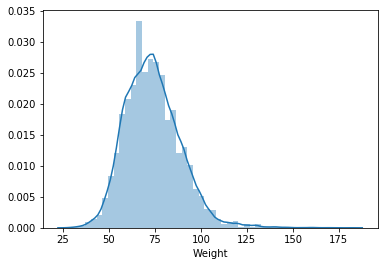

In [8]:
sns.distplot(rest['Weight'])  
plt.savefig('Weight_dist', bbox_inches='tight', dpi=1000)

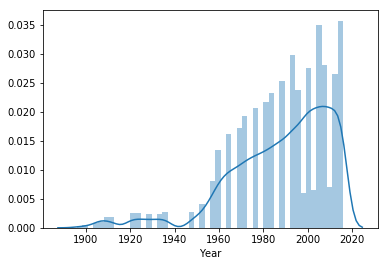

In [9]:
sns.distplot(rest['Year'])  
plt.savefig('Year_dist', bbox_inches='tight', dpi=1000)

# Correct

In [10]:
# Might be bias due to the missing value (show previous figure once again), and old data may not be correct
rest.to_csv('data.csv', index=None)

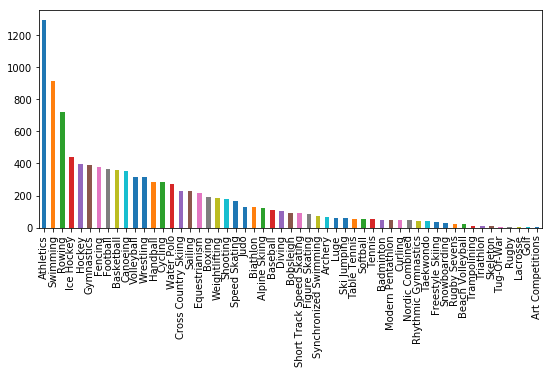

In [11]:
# Different sample sizes of categories, which may lead to Simpson's Paradox, affect the conclusion
rest[rest['Medal'] == 'Gold']['Sport'].value_counts().plot.bar()
fig = plt.gcf()
old_size = fig.get_size_inches()
fig.set_size_inches((old_size[0] * 1.5, old_size[1]))
plt.savefig('Gold_sport_count', bbox_inches='tight', dpi=1000)

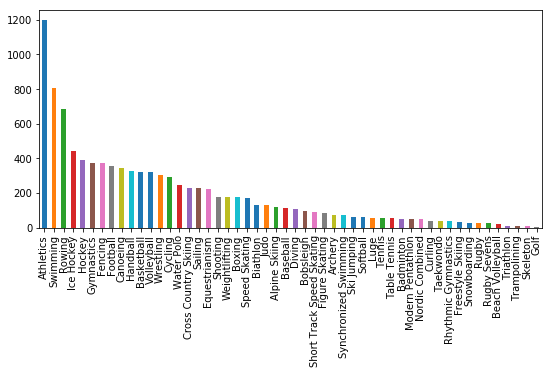

In [12]:
rest[rest['Medal'] == 'Silver']['Sport'].value_counts().plot.bar()
fig = plt.gcf()
old_size = fig.get_size_inches()
fig.set_size_inches((old_size[0] * 1.5, old_size[1]))
plt.savefig('Silver_sport_count', bbox_inches='tight', dpi=1000)

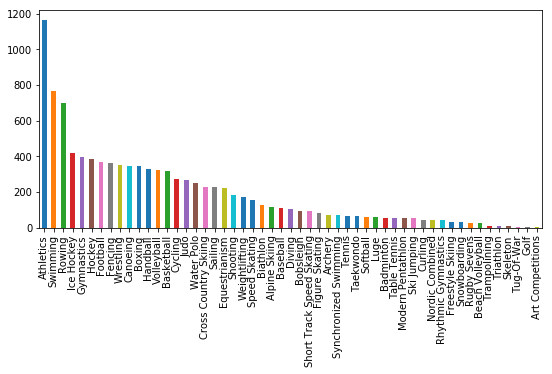

In [13]:
rest[rest['Medal'] == 'Bronze']['Sport'].value_counts().plot.bar()
fig = plt.gcf()
old_size = fig.get_size_inches()
fig.set_size_inches((old_size[0] * 1.5, old_size[1]))
plt.savefig('Bronze_sport_count', bbox_inches='tight', dpi=1000)

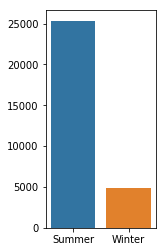

In [14]:
# also there is unbalance in season, though it is reasonable, but it should be aware in conduct detail analysis
seasons = rest['Season'].value_counts()
sns.barplot(seasons.index, seasons.values)
fig = plt.gcf()
old_size = fig.get_size_inches()
fig.set_size_inches((old_size[0] * 0.33, old_size[1]))
plt.savefig('Season_count', bbox_inches='tight', dpi=1000)